In [1]:
import os 
import sys
import torch
import numpy as np
from lattice import Lattice
from random_walk import RandomWalk
from simulation import Simulation
from hard_spheres import HardSpheres
from utils import make_video, scatter_particles_onehighlight
from tqdm import tqdm 

<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


100%|██████████| 12000/12000 [01:16<00:00, 156.67it/s]


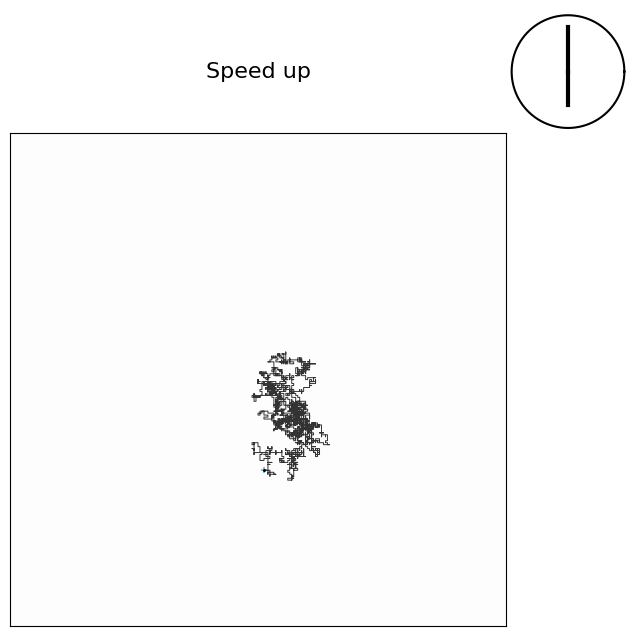

In [15]:
# ##### DIM  #######

# simu_name = "dim2_zoom"

# os.mkdir(simu_name)
# os.mkdir(simu_name + "/frames")

# L = 250
# lat = Lattice(dim=2,L=L)
# rw = RandomWalk(x=np.array([[L/2,L/2]]))
# simu = Simulation(rw,lat)

# # Time parameters #
# simu.rw.rate = 3.0
# simu.clock_rate = 1.0
# t_iter = 0

# ### Step 0: Close look and sloooowww
# simu.lat.set_title("Close look")
# simu.lat.set_zoom(10)
# simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")

# simu.N_nbgh_plot = 1
# simu.N_traj_plot = 1

# for _ in tqdm(range(500)):
#     simu.update(update_nbgh=True)
#     t_iter +=1
#     simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")


# ### Step 1: Dezoom
# simu.lat.set_title("Pause: zoom out")

# lw = 1.0
# for k in tqdm(range(L-10)):
#     simu.lat.set_zoom(10+k)
#     simu.lat.set_lines_param(linewidth=lw/(k+1))
#     simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#     t_iter += 1

    
# ### Step 2: Fast
# simu.lat.set_title("Speed up")

# simu.rw.rate = 30.0
# simu.trajs_plot[0].set(linewidth=0.7)
# for k in tqdm(range(12000)):
#     simu.update(update_nbgh=True)
#     if k%10==0:
#         simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#         t_iter +=1



# make_video(simu_name=simu_name)

In [16]:
# ##### DIM  #######

# simu_name = "dim1_zoom"

# os.mkdir(simu_name)
# os.mkdir(simu_name + "/frames")

# L = 250
# lat = Lattice(dim=1,L=L)
# rw = RandomWalk(x=np.array([L/2]),compute_y=True)
# simu = Simulation(rw,lat,N_nbgh_plot=0,N_traj_plot=0)
# simu.lat.set_height(10.0)
# simu.histo.set(alpha=0.0)

# # Time parameters #
# simu.rw.rate = 3.0
# simu.clock_rate = 1.0
# t_iter = 0

# ### Step 0: Close look and sloooowww
# simu.lat.set_title("One particle...")

# simu.lat.set_zoom(10)
# simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")

# simu.N_nbgh_plot = 0
# simu.N_traj_plot = 0
# simu.rw.compute_y = True

# for _ in tqdm(range(500)):
#     simu.update()
#     simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#     t_iter +=1

# ### Step 1: Add particles

# simu.lat.set_title("Pause: add particles...")

# simu.rw.to_jump[:] = 0.0
# simu.rw.after_jump[:] = 0.0

# for k in tqdm(range(7)):
#     simu.clock_rate = 0.0
#     simu.rw.rate = 0.0
#     x0 = int(L/2 + 2*(np.random.rand()-0.5)*3)
#     simu.rw.add_particles(np.array([x0]))
#     for _ in range(30):
#         simu.update()
#         simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#         t_iter +=1
    
    
# ### Step 2: Run

# simu.lat.set_title("Several particles...")

# simu.rw.falling_rate = 18.0

# for _ in tqdm(range(500)):
#     simu.clock_rate = 1.0
#     simu.rw.rate = 0.8
#     simu.update()
#     simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#     t_iter +=1
    
# for _ in tqdm(range(50)):
#     simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#     t_iter +=1
    
# ### Step 3: Dezoom and add particles

# simu.lat.set_title("Pause: more particles and zoom out...")

# lw = 1.0
# simu.clock_rate = 0.0
# simu.rw.rate = 0.0
# for k in tqdm(range(L-10)):
#     simu.histo = simu._Simulation__plot_histo()
#     simu.lat.set_zoom(10+k)
#     simu.lat.set_height(max(1.6*simu.histo.get_data()[0].max(),simu.lat.ax.get_ylim()[1]))
#     simu.lat.set_lines_param(linewidth=lw/(k+1))
#     simu.histo.remove()
#     simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#     t_iter += 1
#     if (k+1)%5:
#         x0 = np.floor(L/2 + np.random.randn(40)*L/16) % L
#         simu.rw.add_particles(x0)
#         simu.update()
#         simu.particles.set(edgecolor="tab:orange")
#         simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#         t_iter +=1

# ### Step 4: Add even more and switch to histo representation

# simu.lat.set_title("Pause: up to 100,000 particles!")


# simu.rw.compute_y = False
# simu.particles.remove()


# simu.histo = simu._Simulation__plot_histo()
# simu.lat.set_height(2.0*simu.histo.get_data()[0].max())
# simu.update()

# while simu.rw.N<100000:
#     x0 = np.floor(L/2 + np.random.randn(5000)*L/16) % L
#     simu.rw.add_particles(x0)
#     simu.update()
#     # simu.histo = simu._Simulation__plot_histo()
#     simu.lat.set_height(max(1.6*simu.histo.get_data()[0].max(),simu.lat.ax.get_ylim()[1]))
#     simu.lat.set_zoom(L)
#     for _ in range(5):
#         simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#         t_iter +=1

# for _ in tqdm(range(80)):
#     simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#     t_iter +=1

# ### Step 5: Fast
# simu.lat.set_title("Run with 100,000 particles...")

# simu.rw.bound = L
# simu.rw.rate = 30.0
# simu.clock_rate = 1.0
# for k in tqdm(range(12000)):
#     simu.update()
#     if k%10==0:
#         simu.lat.fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
#         t_iter +=1

# make_video(simu_name=simu_name)

In [ ]:
# make_video(simu_name="dim2_zoom")

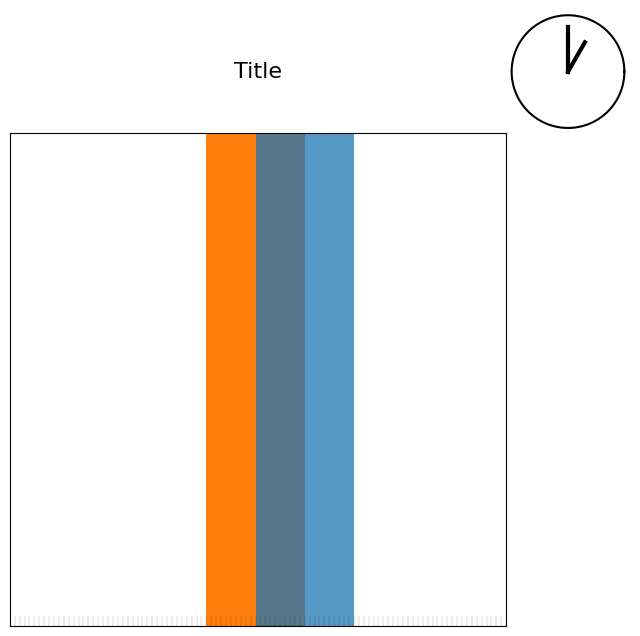

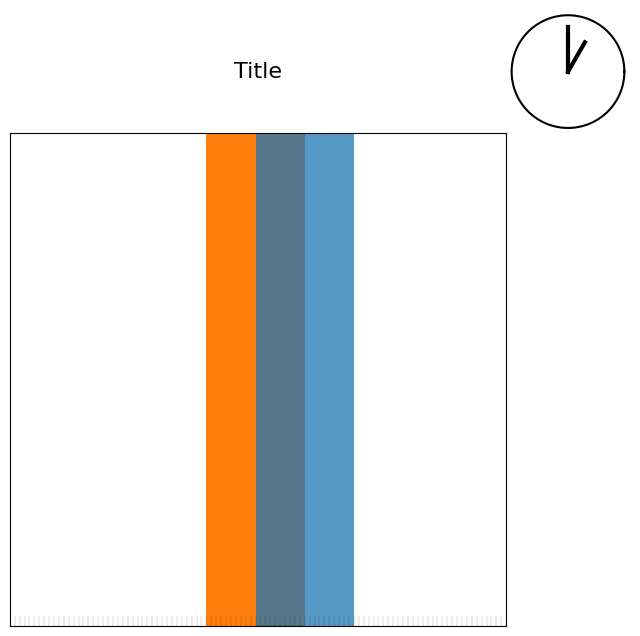

In [2]:
from lattice import Lattice
from tqdm import tqdm


L = 100
lat = Lattice(dim=1,L=L)
x0 = np.floor(L/2 + L/10*(2*np.random.rand(100000)-1.0))
rw = RandomWalk(x=x0,compute_y=False,bound=100)
rw2 = RandomWalk(x=x0+10.0,compute_y=False,bound=100)


# # print(rw.y)

simu = Simulation(rw,lat,N_traj_plot=0,N_nbgh_plot=0)
simu2 = Simulation(rw2,lat,N_traj_plot=0,N_nbgh_plot=0)
simu2.histo.set(facecolor="tab:blue",alpha=0.5)

simu.lat.ax.add_artist(simu2.histo)
simu.lat.set_lines_param(linewidth=0.1)

# # lat.set_zoom(10)
# # lat.x_line_max = 10
# simu.lat.set_height(6000)
# # lat.fig

# # simu.particles.set_edgecolor('tab:orange')
simu.lat.fig


In [ ]:
# #### HARD_SPHERES ####




# N = 3000
# L = 10
# # pos = L*torch.rand(N,2)
# vel = 0.3*torch.randn(N,2)

# # R = 0.05
# R = 0.06 * torch.ones(N)
# R[0] = 0.3
# R0 = torch.max(R).item()
# pos = torch.tensor([[L/2,L/2]]) + (L/2 - 2*R0)*(torch.rand(N,2) - 0.5)*2
# pos[0,:] = torch.tensor([[L/2,L/2]])

# simu = HardSpheres(pos,vel,R,L,[1,1],0.001)
# simu.mass[0] = 3*simu.mass[1]
# # Unfortunately, the initial configuration is likely bad so resample until it is good
# # Super inefficient sampler... 
# is_good, col_index = simu.good_config()
# resample = torch.ones(N)
# while ~is_good:
#     resample = resample * (col_index>=0)
#     resample[0] = 0.0
#     M = resample.sum()
#     print(f"not good: " + str(M.item()))
#     simu.pos[resample.bool(),:] = torch.tensor([[L/2,L/2]]) + (L/2 - R0)*(torch.rand(M.int(),2) - 0.5)*2
#     is_good, col_index = simu.good_config()
   
